In [89]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [90]:
df = pd.read_csv('Iconic_Songs_Dataset.csv')

In [91]:
df.head(20)

,Title,Artist,Genre,ReleaseDate,Duration,Album,Popularity
0,Blinding Lights,The Weeknd,Pop,2024-01-05,3:22,After Hours,95
1,Levitating,Dua Lipa,Pop,2024-01-14,3:23,Future Nostalgia,93
2,Peaches,Justin Bieber ft. Daniel Caesar & Giveon,Pop,2024-02-12,3:18,Justice,91
3,Save Your Tears,The Weeknd,Pop,2024-02-18,3:36,After Hours,92
4,Good 4 U,Olivia Rodrigo,Pop,2024-03-05,2:58,SOUR,94
5,Stay,The Kid LAROI & Justin Bieber,Pop,2024-03-15,2:21,F*CK LOVE 3: OVER YOU,90
6,Kiss Me More,Doja Cat ft. SZA,Pop,2024-03-20,3:28,Planet Her,89
7,Montero (Call Me By Your Name),Lil Nas X,Pop,2024-04-10,2:18,Montero,88
8,Butter,BTS,K-Pop,2024-04-22,2:44,Butter,96
9,drivers license,Olivia Rodrigo,Pop,2024-05-05,4:02,SOUR,97


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        100 non-null    object
 1   Artist       100 non-null    object
 2   Genre        100 non-null    object
 3   ReleaseDate  100 non-null    object
 4   Duration     100 non-null    object
 5   Album        98 non-null     object
 6   Popularity   100 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


#### At Album there are 2 Null values, rest are good

In [93]:
print(len(df.Artist.unique()))
print(df.Genre.unique())
print(len(df.ReleaseDate.unique()))
print(df.Duration.unique())

print(df.Popularity.unique())

69
['Pop' 'K-Pop' 'Afrobeats' 'Country' 'R&B' 'Dance' 'Hip-Hop' 'Electronic'
 'Reggaeton']
83
['3:22' '3:23' '3:18' '3:36' '2:58' '2:21' '3:28' '2:18' '2:44' '4:02'
 '3:32' '3:35' '4:58' '3:50' '3:45' '3:40' '3:46' '3:27' '3:30' '3:02'
 '3:58' '2:33' '2:25' '2:41' '4:08' '3:56' '3:41' '2:29' '3:34' '2:52'
 '3:03' '3:19' '2:54' '2:57' '3:48' '2:56' '2:35' '2:53' '3:10' '2:38'
 '4:21' '3:09' '2:43' '4:05' '2:51' '2:39' '3:57' '2:37' '3:11' '1:55'
 '3:01' '4:22' '3:04' '3:21' '3:59' '5:12' '4:13' '3:07' '4:30' '5:13'
 '3:37' '4:00' '4:14' '3:51' '3:42' '3:31' '3:06' '3:05' '3:13']
[95 93 91 92 94 90 89 88 96 97 85 87 98 86 99 84]


The Popularity values lie between 99 to 84, so it looks like there are no abnormal values

In [94]:
df.describe()

,Popularity
count,100.000000
mean,91.710000
std,3.806679
min,84.000000
25%,89.000000
50%,92.000000
75%,95.000000
max,99.000000


In [95]:
df.Popularity.skew()

0.10940838462887177

Skewed a bit to the right

In [96]:
def find_anomalies(data):
    anomality = []
    stand = st.stdev(data)
    mean_ = st.mean(data)
    standard = 3*stand
    lower_limit = mean_ - stand
    upper_limit = mean_ + stand
    
    for anomaly in data:
        if anomaly>upper_limit and anomaly<lower_limit:
            anomality.append(anomaly)
        
    return anomality

In [97]:
a = find_anomalies(df['Popularity'])
len(a)

0

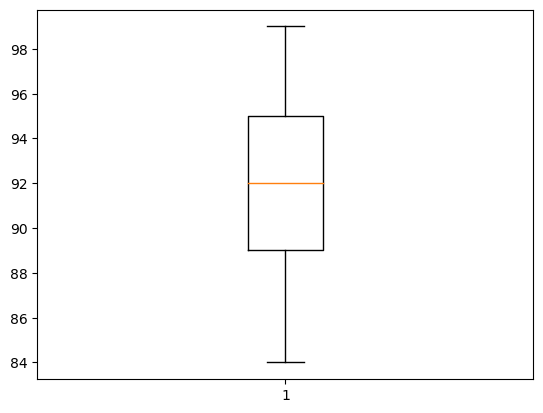

In [98]:
plt.boxplot(df['Popularity'])
plt.show()

this shows that Popularity/target/y is perfect 

# Data Preprocessing
- Genre is in string and we need to convert it to numerical format
- ReleaseDate is in date-month-day format. Convert it to 3 different columns/features

In [99]:
df_new = df.copy()

df_new['ReleaseDate'] = pd.to_datetime(df_new['ReleaseDate'])
df_new['Duration'] = df_new['Duration'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
df_new['Duration'] = pd.to_timedelta(df_new['Duration'],unit='s')

#df_new['ReleaseYear'] = df_new['ReleaseDate'].dt.year
df_new['ReleaseMonth'] = df_new['ReleaseDate'].dt.month

df_new['Seconds'] = df_new['Duration'].dt.total_seconds()

df_new.head()

df_new = df_new.drop(['Title','ReleaseDate','Duration'],axis=1)
df_new.head()

,Artist,Genre,Album,Popularity,ReleaseMonth,Seconds
0,The Weeknd,Pop,After Hours,95,1,202.0
1,Dua Lipa,Pop,Future Nostalgia,93,1,203.0
2,Justin Bieber ft. Daniel Caesar & Giveon,Pop,Justice,91,2,198.0
3,The Weeknd,Pop,After Hours,92,2,216.0
4,Olivia Rodrigo,Pop,SOUR,94,3,178.0


In [100]:
le = LabelEncoder()

Artist_le = le.fit_transform(df_new['Artist'])
Genre_le = le.fit_transform(df_new['Genre'])
Album_le = le.fit_transform(df_new['Album'])

df_new['Artist_le'] = Artist_le
df_new['Genre_le'] = Genre_le
df_new['Album_le'] = Album_le

df_new = df_new.drop(['Artist','Genre','Album'],axis=1)


In [101]:
df_new.Album_le.fillna(st.mean(df_new['Album_le']))

0      4
1     26
2     36
3      4
4     51
      ..
95    31
96    62
97    10
98    10
99    14
Name: Album_le, Length: 100, dtype: int32

In [102]:
scaler = StandardScaler()

df_n = pd.DataFrame({
    #'ReleaseYear_s': scaler.fit_transform(df_new[['ReleaseYear']]).reshape(-1),
    'ReleaseMonth_s': scaler.fit_transform(df_new[['ReleaseMonth']]).reshape(-1),
    'Seconds_s': scaler.fit_transform(df_new[['Seconds']]).reshape(-1),
    'Artist_s': scaler.fit_transform(df_new[['Artist_le']]).reshape(-1),
    'Genre_s': scaler.fit_transform(df_new[['Genre_le']]).reshape(-1),
    'Popularity_s': scaler.fit_transform(df_new[['Popularity']]).reshape(-1),
    'Album_s': scaler.fit_transform(df_new[['Album_le']]).reshape(-1)
})

In [103]:
X = df_n[['Artist_s','Genre_s','ReleaseMonth_s','Seconds_s','Album_s']]
y = df_n['Popularity_s']

type(X)

pandas.core.frame.DataFrame

In [104]:
X

,Artist_s,Genre_s,ReleaseMonth_s,Seconds_s,Album_s
0,1.522602,0.478731,-1.591747,-0.000831,-1.416293
1,-0.571158,0.478731,-1.591747,0.026866,-0.271183
2,0.061839,0.478731,-1.305976,-0.111619,0.249322
3,1.522602,0.478731,-1.305976,0.386927,-1.416293
4,0.840913,0.478731,-1.020204,-0.665559,1.030078
...,...,...,...,...,...
95,1.035681,-0.929301,1.551739,-1.191803,-0.010931
96,-0.230314,1.886763,1.551739,-0.443983,1.602633
97,-0.863311,1.886763,1.551739,0.276139,-1.103990
98,-0.912003,1.886763,-1.591747,-0.471680,-1.103990


In [105]:
y

0     0.868624
1     0.340585
2    -0.187454
3     0.076566
4     0.604605
        ...   
95   -0.979513
96    0.340585
97   -0.187454
98   -0.715493
99   -0.451473
Name: Popularity_s, Length: 100, dtype: float64

In [106]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

del X_,y_

70% for training set, 15% for Cross Validation set and 15% for test set

# Model

## 1. Linear Regression

In [107]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [108]:
yhat1 = model1.predict(X_cv)
yhat2 = model1.predict(X_test)

print(f"CV MSE: {mean_squared_error(y_cv,yhat1)}")
print(f"Test MSE: {mean_squared_error(y_test,yhat2)}")
print("\n")
print(f"CV R-Square: {r2_score(y_cv,yhat1)}")
print(f"Test R-Square: {r2_score(y_test,yhat2)}")

CV MSE: 0.7534335425728023
Test MSE: 1.1395778970269237


CV R-Square: -0.08860944858500952
Test R-Square: -0.06188246951953569


## 2. Support Vector Regressor

In [109]:
svr = SVR()
svr.fit(X_train,y_train.ravel())

SVR()

In [110]:
yhat3 = svr.predict(X_cv)
yhat4 = svr.predict(X_test)

print(f"CV MSE: {mean_squared_error(y_cv,yhat3)}")
print(f"Test MSE: {mean_squared_error(y_test,yhat4)}")
print("\n")
print(f"CV R-Square: {r2_score(y_cv,yhat3)}")
print(f"Test R-Square: {r2_score(y_test,yhat4)}")

CV MSE: 0.7608538049885609
Test MSE: 1.1392434736403372


CV R-Square: -0.0993307230177769
Test R-Square: -0.06157084682788816


## 3. Random Forest Regressor

In [111]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [112]:
yhat5 = rfr.predict(X_cv)
yhat6 = rfr.predict(X_test)

print(f"CV MSE: {mean_squared_error(y_cv,yhat5)}")
print(f"Test MSE: {mean_squared_error(y_test,yhat6)}")
print("\n")
print(f"CV R-Square: {r2_score(y_cv,yhat5)}")
print(f"Test R-Square: {r2_score(y_test,yhat6)}")

CV MSE: 1.122082267407413
Test MSE: 1.425409815115585


CV R-Square: -0.6212569382273947
Test R-Square: -0.3282266166281753


### Hence Support Vector Regressor is the best model for this dataset